In [1]:
import pandas as pd
import numpy as np
import itertools
import string
import json
import glob
import re

#Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Gensim LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import TfidfModel

import spacy

#Plotting LDA
import pyLDAvis
import pyLDAvis.gensim
#Plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

#Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# tqdm.notebook.tqdm
from tqdm.notebook import tqdm

C:\Users\65987\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\65987\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
df = pd.read_csv('sentiment_data_file_path')

In [3]:
#Grouping countries into continent
def continent(country):
    na = ['USA', 'Canada']
    eu = ['United Kingdom']
    asia = ['Singapore', 'Malaysia', 'Brunei', 'Taiwan', 'Vietnam', 'Sri Lanka']
    if country in na:
        return 'America'
    elif country in eu:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    elif country == 'Australia':
        return 'Australia'
    elif country == 'New Zealand':
        return 'Oceania'

In [4]:
df['Continent'] = df['Country'].apply(continent)

In [5]:
df['Continent'].value_counts()

Continent
America      496910
Asia          61616
Australia     25173
Oceania        6400
Europe           94
Name: count, dtype: int64

In [6]:
df = df[df['Continent'] != 'Europe']

In [7]:
df = df.drop_duplicates(subset='Review', keep='first')

In [9]:
df.shape

(455281, 25)

In [12]:
df['brand'].unique()

array(['SEPHORA COLLECTION', 'FRESH', 'FENTY BEAUTY', 'CAUDALIE',
       'FIRST AID BEAUTY', 'GLOW RECIPE', 'LAB SERIES', 'THE ORDINARY',
       'THE INKEY LIST', 'FARMACY', 'SK-II', 'SHU UEMURA',
       'SATURDAY SKIN', 'LANEIGE', 'TATCHA', 'BIOSSANCE', 'DR.JART+',
       'ALPHA-H', 'FRANK BODY', 'ORIGINS', 'FENTY SKIN',
       'PETER THOMAS ROTH', 'CLINIQUE', 'ESTÉE LAUDER', 'LA MER',
       'OLE HENRIKSEN', 'SULWHASOO', 'PIXI', 'DR. DENNIS GROSS',
       'GLO SKIN BEAUTY', 'INNISFREE', 'DRUNK ELEPHANT', 'DERMALOGICA',
       'NUDESTIX', 'ELEMIS', 'SKIN INC', 'SHISEIDO', 'IT COSMETICS',
       'BOSCIA', 'SUNDAY RILEY', 'MAC COSMETICS', 'CLE DE PEAU', 'DIOR',
       'EVE LOM', 'BENEFIT COSMETICS', 'JUICE BEAUTY', 'GIVENCHY',
       'MALIN + GOETZ', 'BRIOGEO', 'MARIO BADESCU', "BURT'S BEES",
       'INDIE LEE', 'KOPARI', 'JACK BLACK', 'PHILOSOPHY', 'KENZOKI',
       'DRGL', 'THREE', 'LANCÔME', 'GUERLAIN', 'MAKE UP FOR EVER',
       'PAI SKINCARE', 'WANDER BEAUTY', 'CHARLOTTE TILBURY',


In [10]:
m_fab = df[(df['brand'] == 'FIRST AID BEAUTY') & (df['product_type'] == 'moisturiser')]

In [11]:
m_de = df[(df['brand'] == 'DRUNK ELEPHANT') & (df['product_type'] == 'moisturiser')]

In [13]:
m_lan = df[(df['brand'] == 'LANCÔME') & (df['product_type'] == 'moisturiser')]

In [14]:
m_der = df[(df['brand'] == 'DERMALOGICA') & (df['product_type'] == 'moisturiser')]

In [15]:
m_sg = df[(df['brand'] == 'SUPERGOOP!') & (df['product_type'] == 'moisturiser')]

In [19]:
m_tat = df[(df['brand'] == 'TATCHA') & (df['product_type'] == 'moisturiser')]

In [22]:
t_gr = df[(df['brand'] == 'GLOW RECIPE') & (df['product_type'] == 'toner')]

In [23]:
t_oh = df[(df['brand'] == 'OLE HENRIKSEN') & (df['product_type'] == 'toner')]

In [25]:
t_ss = df[(df['brand'] == 'SATURDAY SKIN') & (df['product_type'] == 'toner')]

In [26]:
t_p = df[(df['brand'] == 'PIXI') & (df['product_type'] == 'toner')]

In [28]:
mas_to = df[(df['brand'] == 'THE ORDINARY') & (df['product_type'] == 'mask and treatment')]

In [30]:
mas_f = df[(df['brand'] == 'FRESH') & (df['product_type'] == 'mask and treatment')]

In [31]:
mas_bc = df[(df['brand'] == 'BENEFIT COSMETICS') & (df['product_type'] == 'mask and treatment')]

In [32]:
mas_jb = df[(df['brand'] == 'JACK BLACK') & (df['product_type'] == 'mask and treatment')]

In [33]:
mas_fab = df[(df['brand'] == 'FIRST AID BEAUTY') & (df['product_type'] == 'mask and treatment')]

In [34]:
mas_mb = df[(df['brand'] == 'MARIO BADESCU') & (df['product_type'] == 'mask and treatment')]

In [37]:
cf_f = df[(df['brand'] == 'FRESH') & (df['product_type'] == 'cleanser-and-exfoliator')]

In [39]:
cf_b = df[(df['brand'] == 'BOSCIA') & (df['product_type'] == 'cleanser-and-exfoliator')]

In [41]:
cf_su = df[(df['brand'] == 'SHU UEMURA') & (df['product_type'] == 'cleanser-and-exfoliator')]

In [42]:
cf_de = df[(df['brand'] == 'DRUNK ELEPHANT') & (df['product_type'] == 'cleanser-and-exfoliator')]

In [43]:
cf_sr = df[(df['brand'] == 'SUNDAY RILEY') & (df['product_type'] == 'cleanser-and-exfoliator')]

In [44]:
subset_df = pd.concat([m_fab, m_de, m_lan, m_der, m_sg, m_tat, t_gr, t_oh, t_ss, t_p, mas_to, mas_f, mas_bc, mas_jb, mas_fab, mas_mb, cf_f, cf_b, cf_su, cf_de, cf_sr], axis=0)

In [51]:
subset_df.shape

(119076, 25)

In [54]:
filtered_df = pd.concat([df, subset_df, subset_df]).drop_duplicates(keep=False)

### 1) Text Processing

In [62]:
#text preprocessing
def remove_special_characters(text):
    filtered_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return filtered_text

stop_words = stopwords.words('english')
def remove_stopwords(filtered_text):
    tokens = nltk.word_tokenize(filtered_text)
    stopword_removed = [token.lower() for token in tokens if token.lower() not in stop_words] #Tokenized and case normalized
    return stopword_removed

def exclude_list(stopwords_removed_list):
    exclude_list = ['ill', 'pia', 'would', 'le', 'yes', 'nada', 'tbh', 'ac', 'ch', 'say', 
                    'id', 'get', 'think', 'esp', 'saw', 'also', 'mr', 'still', 'im', 'gon', 
                    'na', 'btw', 'n', 'acc', 'lil', 'ive', 'p', 'le', 'meh', 'ig', 'v', 'm', 
                    'say', 'ie', 'use', 'using', 'used', 'product', 'make', 'get', 'go', 'maybe',
                   'probably', 'know', 'come', 'already', 'thought', 'there', 're']
    removed_exclude_list = [word for word in stopwords_removed_list if word not in exclude_list]
    return removed_exclude_list

lemmatizer = WordNetLemmatizer()
def lemmatize(removed_exclude_list):
    lemmatized_list = [lemmatizer.lemmatize(word) for word in removed_exclude_list]
    return lemmatized_list


def clean_document(text):
    filtered_text = remove_special_characters(text)
    stopwords_removed_list = remove_stopwords(filtered_text)
    removed_exclude_list = exclude_list(stopwords_removed_list)
    lemmatized_list = lemmatize(removed_exclude_list)
    
    word_list = []
    for words in lemmatized_list:
        word_list.append(words)
    corpus = " ".join(word_list)
    return corpus

def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) #computationally less expensive
    text_out = []
    
    for text in tqdm(texts, total=len(texts)):
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        text_out.append(final)
        
    return text_out

def gen_words(texts):
    final = []
    for text in tqdm(texts, total = len(texts)):
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return final

def make_bigrams(texts):
    return (bigram[doc] for doc in texts)

def make_trigram(texts):
    return (trigram[bigram[doc]] for doc in texts)

def Sort(sub_list):
    sub_list.sort(key = lambda x: x[1]) #sort based on index 1
    sub_list.reverse()
    return sub_list

In [57]:
reviews = filtered_df['Review'].tolist()

In [63]:
#Document preprocessing
cleaned_docs = []
for r in tqdm(reviews, total=len(reviews)):
    corpus = clean_document(r)
    if corpus is not None:  # Check for NoneType object
        cleaned_docs.append(corpus)
    else:
        print("Encountered NoneType object for input:", r)


  0%|          | 0/336205 [00:00<?, ?it/s]

### 2) LDA Data Processing

In [64]:
lemmatized_text = lemmatization(cleaned_docs)
data_words = gen_words(lemmatized_text)

  0%|          | 0/336205 [00:00<?, ?it/s]

  0%|          | 0/336205 [00:00<?, ?it/s]

In [65]:
#Bigram and Trigram
bigrams_phrases = gensim.models.Phrases(data_words, 
                                        min_count=5,
                                       threshold=50,) #List of list of words, min appear 5times to considered as bigram

trigram_phrases = gensim.models.Phrases(bigrams_phrases[data_words],
                                       threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

data_bigrams = list(make_bigrams(data_words))
data_bigrams_trigrams = list(make_trigram(data_bigrams))


In [66]:
# TF-IDF is used for removal of frequency words
#drawback: important words left out because important words appear with high frequency

#LDA model data prep
id2word = corpora.Dictionary(data_bigrams_trigrams)
texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts] #convert to bag of words
print(corpus[0][:20])

tfidf = TfidfModel(corpus, id2word=id2word)
low_value = 0.07
words = []
words_missing_in_tfidf = []

#If word appear in frequency, it is less value to clustering algorithm.
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words + words_missing_in_tfidf
    
    for item in drops:
        words.append(id2word[item])
    
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] #the words with tf_idf score 0 will be missing
    
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow


[(0, 1), (1, 1), (2, 1), (3, 2)]


In [67]:
corpus_df = pd.DataFrame(corpus)

corpus_df

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,"(0, 1)","(1, 1)","(2, 1)","(3, 2)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"(1, 1)","(4, 1)","(5, 1)","(6, 1)","(7, 1)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"(1, 1)","(3, 1)","(8, 1)","(9, 1)","(10, 1)","(11, 1)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"(1, 1)","(12, 1)","(13, 1)","(14, 1)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"(8, 1)","(15, 1)","(16, 1)","(17, 1)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336200,"(24, 1)","(40, 1)","(56, 1)","(58, 1)","(177, 1)","(306, 1)","(532, 1)","(632, 1)","(760, 1)","(1342, 2)",...,None,None,None,None,None,None,None,None,None,None
336201,"(18, 1)","(57, 1)","(101, 1)","(134, 1)","(146, 2)","(154, 1)","(167, 1)","(184, 1)","(215, 1)","(225, 1)",...,None,None,None,None,None,None,None,None,None,None
336202,"(23, 1)","(202, 1)","(254, 1)","(644, 1)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
336203,"(28, 1)","(40, 1)","(58, 2)","(129, 1)","(167, 1)","(180, 1)","(323, 1)","(369, 2)","(381, 1)","(608, 1)",...,None,None,None,None,None,None,None,None,None,None


### 3) Train Test Split

In [68]:
train_indices, validation_indices = train_test_split(corpus_df.index, test_size=0.2, random_state=42)
train_corpus, validation_corpus = train_test_split(corpus, test_size = 0.2, random_state=42)

In [69]:
num_topics_list = list(range(6,30,2))
#Grid of hyperparameter combinations
hyperparameter_grid = list(itertools.product(num_topics_list))
#Train and evaluate models for each hyperparameter combination
best_perplexity = float('inf')
best_model = None
best_coherence = -1  # Initialize best_coherence to a low value

#Identifying the best number of topics using log perplexity
topics = []
perplexity_scores = []
coherence_scores = []
for num_topics in tqdm(num_topics_list, total=len(num_topics_list)):
    lda_model = gensim.models.LdaModel(corpus=train_corpus, id2word=id2word, num_topics=num_topics)
    perplexity = lda_model.log_perplexity(validation_corpus)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    topics.append(num_topics)
    perplexity_scores.append(perplexity)
    coherence_scores.append(coherence_lda)  # Add coherence score
    print(f'Number of topics: {num_topics}, Perplexity: {perplexity}, Coherence: {coherence_lda}')
    if perplexity < best_perplexity and coherence_lda > best_coherence:
        best_perplexity = perplexity
        best_coherence = coherence_lda
        best_model = lda_model
print('Best number of topics:', best_model.num_topics)
print('Best Coherence Score:', best_coherence)


  0%|          | 0/12 [00:00<?, ?it/s]

Number of topics: 6, Perplexity: -7.020487586726048, Coherence: 0.5252628177066724
Number of topics: 8, Perplexity: -7.088774570939697, Coherence: 0.5269795223267575
Number of topics: 10, Perplexity: -7.250477763103712, Coherence: 0.5453414745700373
Number of topics: 12, Perplexity: -7.5376602648352575, Coherence: 0.5374362547187445
Number of topics: 14, Perplexity: -7.719407260479756, Coherence: 0.5553688448247326
Number of topics: 16, Perplexity: -7.823684731101825, Coherence: 0.5611952478193422
Number of topics: 18, Perplexity: -7.9237734952384775, Coherence: 0.5801172069970063
Number of topics: 20, Perplexity: -8.056566205353525, Coherence: 0.560464832611802
Number of topics: 22, Perplexity: -8.171126384408124, Coherence: 0.5551323465408017
Number of topics: 24, Perplexity: -8.287416286829005, Coherence: 0.5586306786032637
Number of topics: 26, Perplexity: -8.420774804615329, Coherence: 0.5531887957336625
Number of topics: 28, Perplexity: -8.516569782882689, Coherence: 0.5594084514

The optimal number of topics: 18


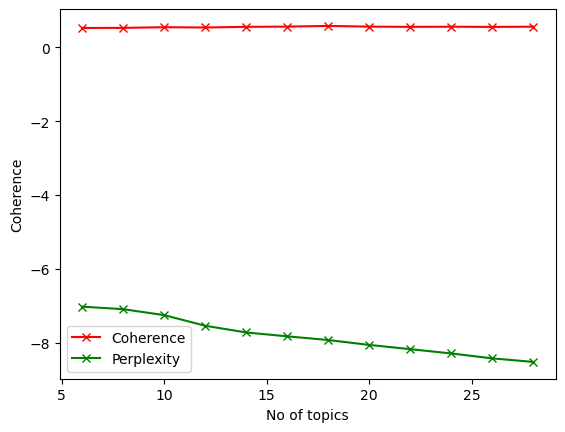

In [70]:
plt.plot(num_topics_list, coherence_scores,'r-x',label='Coherence')
plt.plot(num_topics_list, perplexity_scores,'g-x', label='Perplexity')
plt.xlabel("No of topics")
plt.ylabel("Coherence")
plt.legend()

#Optimal number of topics based on validation accuracy
ind = coherence_scores.index(max(coherence_scores))
opt_topics = num_topics_list[ind]
print(f"The optimal number of topics: {opt_topics}")


### 4) LDA

In [71]:
full_model =  gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word = id2word,
                                           num_topics=opt_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto')


In [72]:
full_model.save("full_model.model")


In [73]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(full_model, corpus, id2word, mds="mmds", R=10, sort_topics=False)
vis

C:\Users\65987\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.075685  0.493219       1        1  14.941113
1      0.338603  0.335427       2        1   4.317412
2     -0.285326  0.398641       3        1   6.914114
3      0.034392 -0.508269       4        1   3.219989
4      0.153039  0.448988       5        1   2.391566
5     -0.228660 -0.419643       6        1   2.898168
6     -0.289270  0.166758       7        1   4.769732
7      0.028698  0.222760       8        1   2.248831
8      0.456269 -0.065083       9        1   2.117232
9     -0.433341 -0.079060      10        1   3.035032
10     0.201423  0.017444      11        1   2.907650
11    -0.145146 -0.106875      12        1   8.310645
12    -0.423545 -0.285217      13        1   9.158843
13     0.017240 -0.297677      14        1   1.805793
14    -0.484599  0.165752      15        1   3.728239
15     0.250615 -0.375519      16        1   6.180849
16     0.411509 -0.271717      17        1   4.223089
17     0.473782  0.160070      18        1  16.831702, topic_info=       Term           Freq          Total Category  logprob  loglift
17     skin  124788.000000  124788.000000  Default  10.0000  10.0000
12     love  142532.000000  142532.000000  Default   9.0000   9.0000
63    great  126869.000000  126869.000000  Default   8.0000   8.0000
441     eye  166164.000000  166164.000000  Default   7.0000   7.0000
478    mask  182418.000000  182418.000000  Default   6.0000   6.0000
..      ...            ...            ...      ...      ...      ...
28      dry  109598.965043  109600.951941  Topic18  -2.4271   1.7819
23     make   96729.197559   96731.184458  Topic18  -2.5520   1.7819
29     even   62304.090889   62306.077788  Topic18  -2.9919   1.7819
493    oily   45870.615446   45872.602344  Topic18  -3.2981   1.7819
69   sticky   40688.129010   40690.115909  Topic18  -3.4180   1.7819

[240 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
47        2  0.999747  affordable
109       4  0.999972     amazing
206      11  0.999919        area
241       8  0.999891        back
256       6  0.999940         bad
...     ...       ...         ...
265       4  0.998048         wet
105       5  0.999852      wonder
7         1  0.999983        work
165      13  0.999959       worth
94       16  0.999907        year

[161 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [ ]:
# filtered_df.drop(columns = ['Unnamed: 0.1', 'id'], inplace=True)
# filtered_df.reset_index(inplace=True)
# filtered_df.drop(columns='index', inplace=True)
# filtered_df.reset_index(inplace=True)
# full_model_topics = pd.concat([filtered_df, topic_df], axis=1)

In [74]:
topic_distribution = [full_model.get_document_topics(doc) for doc in corpus]
len(topic_distribution)

topic_pairs = []
main_topic = []
second_topic = []
third_topic = []

for n in range(len(topic_distribution)):
    pairs = []
    sorted_list = Sort(topic_distribution[n]) #Sort the percentage belonging to topic
    
    for pair in sorted_list[:1]:
        main_topic.append([n, pair[0], pair[1]])
    for pair in sorted_list[1:2]:
        second_topic.append([n, pair[0], pair[1]])
    for pair in sorted_list[2:3]:
        third_topic.append([n, pair[0], pair[1]])
    
    for pair in sorted_list[:5]:
        pairs.append(pair[0])
    topic_pairs.append(pairs)

topic_dict = {}
for n in range(len(topic_distribution)):
    topic_dict[n] = topic_pairs[n]


In [83]:
topic_df = pd.DataFrame(topic_dict).T

full_model_topics = pd.concat([filtered_df, topic_df], axis=1)

main_topic_df = pd.DataFrame(main_topic, columns = ['index', 'main topic', 'percentage'])
second_topic_df = pd.DataFrame(second_topic, columns = ['index', 'second topic', 'percentage'])
third_topic_df = pd.DataFrame(third_topic, columns = ['index', 'third topic', 'percentage'])

main_topic_df.drop(columns='index', inplace=True)
second_topic_df.drop(columns='index', inplace=True)
third_topic_df.drop(columns='index', inplace=True)


### 5) Topic Labeling

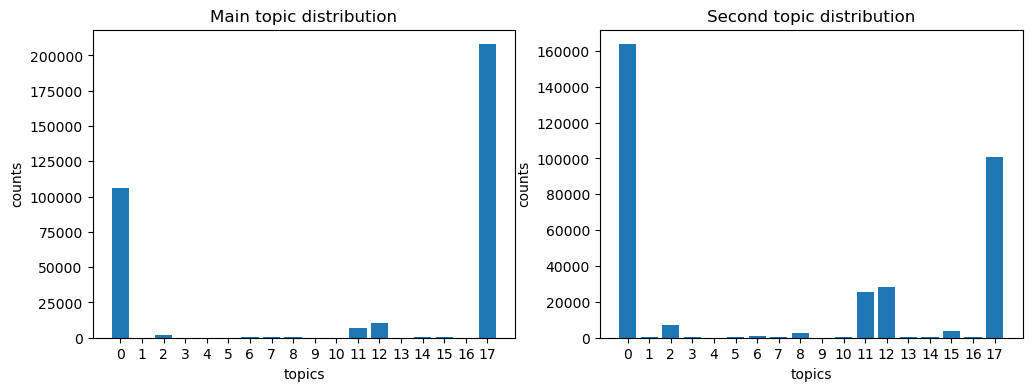

In [76]:
fig = plt.figure(figsize = (12,4))
axes1 = fig.add_subplot(1,2,1)

main_topic_counts = main_topic_df['main topic'].value_counts()
axes1.bar(main_topic_counts.index, main_topic_counts)
plt.xlabel('topics')
plt.ylabel('counts')
plt.xticks(main_topic_counts.index.astype(int))
plt.title('Main topic distribution')

secondary_topic_counts = second_topic_df['second topic'].value_counts()
axes2 = fig.add_subplot(1,2,2)
axes2.bar(secondary_topic_counts.index, secondary_topic_counts)
plt.xlabel('topics')
plt.ylabel('counts')
plt.xticks(secondary_topic_counts.index.astype(int))
plt.title('Second topic distribution')

plt.show()


In [101]:
main_topic_df[main_topic_df['main topic'] == 0].sort_values(by='percentage', ascending=False)[['main topic', 'percentage']][:10]


,main topic,percentage
108498,0,0.434965
236679,0,0.419519
207532,0,0.391930
221900,0,0.390277
90210,0,0.389329
109170,0,0.375029
139834,0,0.368268
202754,0,0.365109
196807,0,0.363329
106464,0,0.363323


In [78]:
second_topic_df[second_topic_df['second topic'] == 0].sort_values(by='percentage', ascending=False)[['second topic', 'percentage']][:10]


,second topic,percentage
197916,0,0.287845
3925,0,0.258701
258038,0,0.256748
115316,0,0.255333
113246,0,0.250950
271711,0,0.250886
314516,0,0.246338
90063,0,0.245696
104728,0,0.245298
91053,0,0.241875


In [86]:
topic_df

,0,1,2,3,4
0,12,17,0,11,6
1,0,17,12,11,2
2,17,12,0,10,11
3,0,17,12,14,11
4,17,0,8,12,11
...,...,...,...,...,...
336200,17,0,11,15,12
336201,0,17,12,10,5
336202,17,0,2,12,11
336203,17,11,0,6,2


In [97]:
full_model_topics[full_model_topics['index'] == 4712]['Review'].tolist()


['works well if follow instructions need to be applied dry almost like a cold cream that isnt sticky. removes makeup well, not drying, price point amazing. the only complaint i have is it stings the eyes']

In [102]:
full_model_clusters = {
    0: 'First impression and usage experience',
    1: 'Quality and satisfaction feedback',
    2: 'Delivery and packaing experience',
    3: 'customer appreciation and positive feedback',
    4: 'Product irritation',
    5: 'Skin texture and application experience',
    6: 'Usage experience and preferences',
    7: 'Formula changes and miss old product',
    8: 'Effective skincare and hydration',
    9: 'Brand preferrences for combination skin',
    10: 'Texture and moisturizing ingredient',
    11: 'Good smell',
    12: 'Sensitive and price concerns',
    13: 'Product irritation',
    14: 'Product satisfaction and longevity',
    15: 'Free product samples',
    16: 'Trial and packaging disappointment',
    17: 'Mask sensation'}


In [103]:
full_model_topics[0] = full_model_topics[0].map(full_model_clusters)
full_model_topics[1] = full_model_topics[1].map(full_model_clusters)
full_model_topics[2] = full_model_topics[2].map(full_model_clusters)
full_model_topics[3] = full_model_topics[3].map(full_model_clusters)
full_model_topics[4] = full_model_topics[4].map(full_model_clusters)


In [104]:
full_model_topics.to_csv('0_full_model_topics.csv')


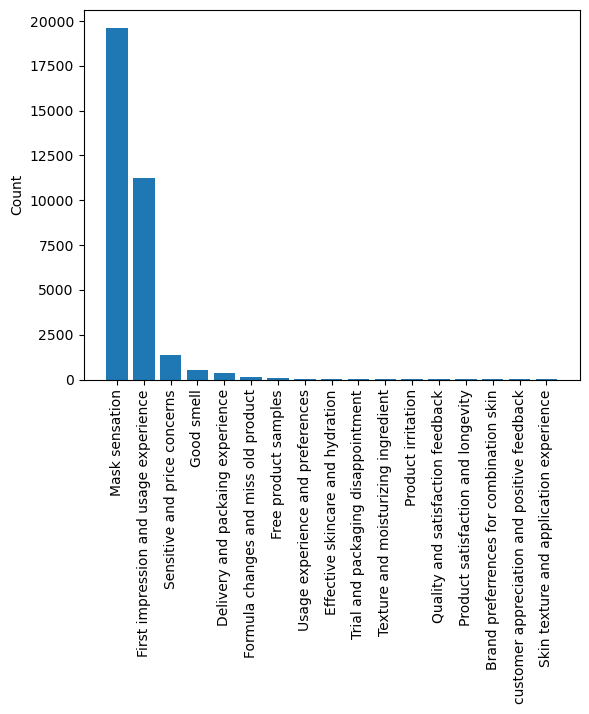

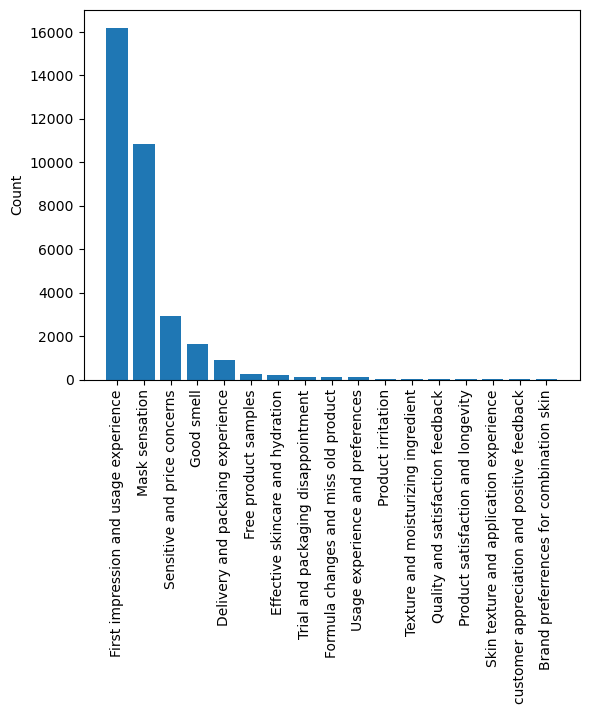

In [105]:
neg = full_model_topics[full_model_topics['predicted sentiment'] == 'negative']

t1 = neg[0].value_counts()
plt.bar(t1.index, t1)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

t2 = neg[1].value_counts()
plt.bar(t2.index, t2)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


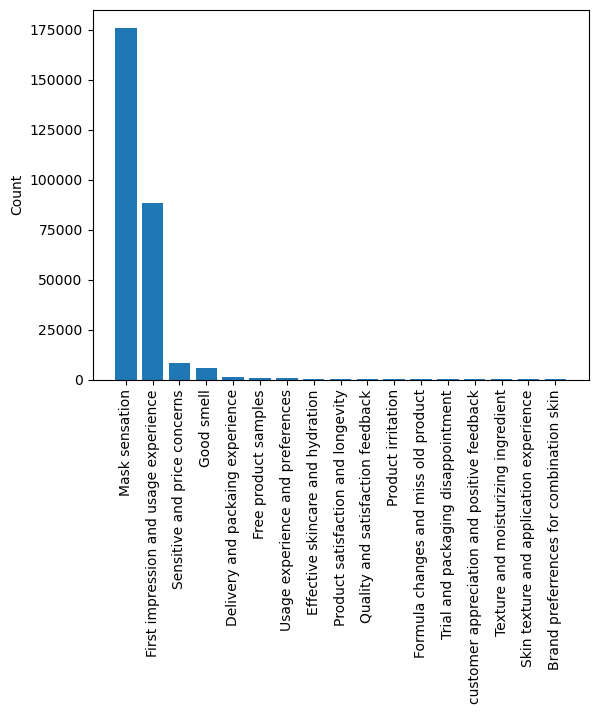

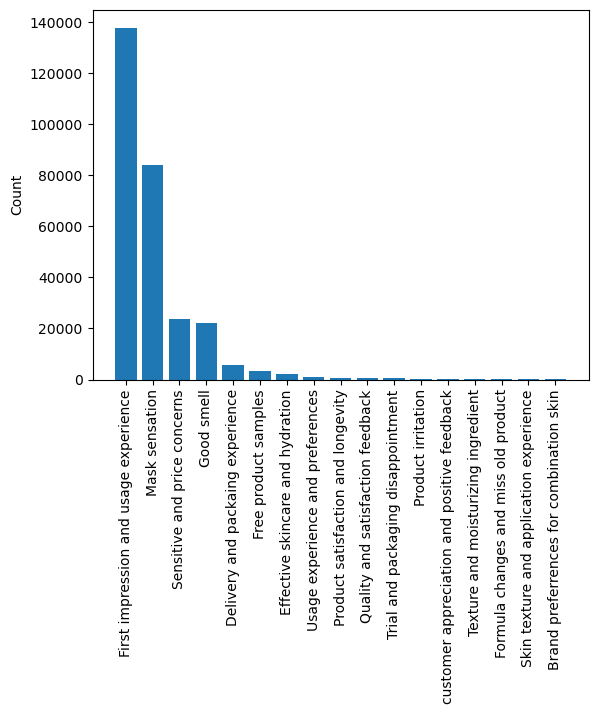

In [106]:
pos = full_model_topics[full_model_topics['predicted sentiment'] == 'positive']

t1 = pos[0].value_counts()
plt.bar(t1.index, t1)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

t2 = pos[1].value_counts()
plt.bar(t2.index, t2)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()
